<a href="https://colab.research.google.com/github/LeoMajorR/Infosec-Resources/blob/master/bs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor


In [ ]:
# Create toy data 
f=open("HPinSC25.txt", "r")
x=[]
y=[]
for line in f:
    line=line.split()
    x.append(int(line[1]))
    y.append(int(line[0]))

In [ ]:
X = np.vstack([x, np.ones(len(x))]).T

n_estimators = 50
model = BaggingRegressor(LinearRegression(), 
                         n_estimators=n_estimators,
                         bootstrap=True)


[ 55.75092689  74.66145103  59.68740334  42.24340964  44.55898402
  50.96540649  71.41964689  74.89300847  66.55694069  62.08016354
  61.15393379  58.29805871  64.62729536  77.59451192  46.33425772
  56.83152827  81.99410325  52.817866    80.14164375  63.70106561
  57.14027152 130.15805047  56.05967014  49.11294698  51.42852137
  55.36499782  49.19013279  41.47155151  47.56923072  43.16963939
  42.47496708  48.18671723  43.47838264  43.70994008  47.4148591
  60.6136331   62.85202167  51.73726462  48.41827467  44.48179821
  55.05625457  88.16896828  47.18330166  54.97906876  61.15393379
  55.59655526  42.93808195  62.4660926   44.32742659  81.99410325
  49.49887605  58.45243034  65.09041024  80.60475862  68.17784276
  62.08016354  69.18125832  65.39915349  69.18125832]


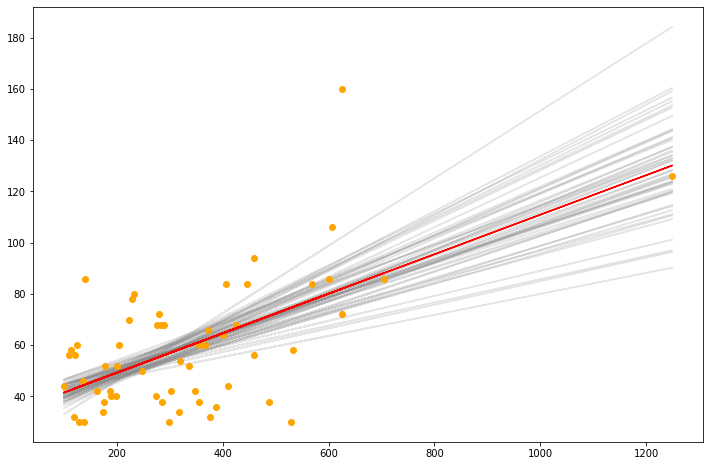

In [ ]:
model.fit(X, y)
print((model.predict(X)))
plt.figure(figsize=(12,8))
# Accessing each base_estimator (already fitted)
for m in model.estimators_:
    plt.plot(x, m.predict(X), color='grey', alpha=0.2, zorder=1)

plt.scatter(x,y, marker='o', color='orange', zorder=4)

# "Bagging model" prediction
plt.plot(x, model.predict(X), color='red', zorder=5)
#print(m.predict(X))
plt.show()

In [23]:

import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
 
df = pd.read_csv('/content/data.csv')
df.head()

,x,y
0,38,285
1,30,530
2,52,336
3,56,110
4,86,140


In [24]:
X = df.iloc[:,0]
y = df.iloc[:,1]

In [25]:
model = Sequential()
model.add(Dense(1, input_dim=1))
model.add(Activation('linear'))

In [26]:
sgd = SGD(0.01)
model.compile(loss='mse',optimizer=sgd)

In [27]:
history = model.fit(X,y,epochs=500,verbose=0)

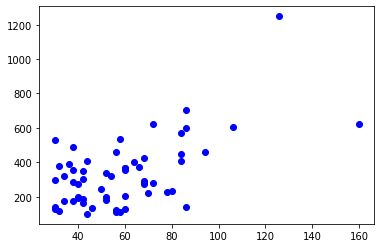

In [28]:
pred = model.predict(X)
plt.scatter(X, y, c='blue')
plt.plot(X, pred, color='red')
plt.show()

In [ ]:
df_binary = df[['X', 'velocity']]